In [1]:
# Qiskit Machine Learning

#We have a k-dimensional data sample
#We use the the data as amplitudes to the statevector

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
start = time.time()
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit.circuit.library import HGate, ZGate, XGate
from qiskit import BasicAer, Aer
from qiskit.aqua.circuits import StateVectorCircuit
from qiskit.visualization import plot_histogram

In [2]:
# We are using amplitude encoding to encode our features in a quantum circuit. 
# With this we expect to encode 32 features in five qubits.

# For such encoding we will use StateVectorCircuit. 
state_vector = [-1/2, 1/2, 1/2, -1/2]

state_vector_circuit = StateVectorCircuit(state_vector).construct_circuit()

job = execute(state_vector_circuit, Aer.get_backend('statevector_simulator'), optimization_level=0)
result = job.result()

outputstate = result.get_statevector(state_vector_circuit)

print(outputstate)
print(state_vector)

[ 0.5+0.000000e+00j -0.5-6.123234e-17j -0.5-6.123234e-17j
  0.5+0.000000e+00j]
[-0.5, 0.5, 0.5, -0.5]


### The StateVectorCircuit does not respect global phase

The target state,$|\psi_{t}\rangle$, i.e. `[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]` and the state $|\psi\rangle$ that we get `[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]` differ by a total factor of $-1$, i.e.,

$$
|\psi\rangle = (-1)\times|\psi_{t}\rangle = -|\psi_{t}\rangle.
$$
Such an overall factor is known as a *global* phase. People think of it as a phase, because we can write $-1 = e^{i\phi}$ for $\phi=\pi$. Note that QISKIT not only considers global phases when $\phi$ *is* equal to $\pi$, but $\phi$ can be anything between $0$ and $2\pi$.

Qiskit does not care about global phases, because whenever we try to retrieve information (i.e. a measurement) from a state the global phase **cannot** play a role. Therefore, we normally just disregard the global phase, and we set the first entry in our statevector to a real, positive value.

However, the sign difference between elements in the above statevector $|\psi_{t}\rangle$, *does* play a vital role. It is the *relative* phase, because it is a phase of one element of the statevector relative to the other. Also note that if we limit ourselves to only real elements (thereby setting any relative phase $\phi_{rel}$ to $0$ or $\pi$), we severely limit the quantum advantage that we can attain.

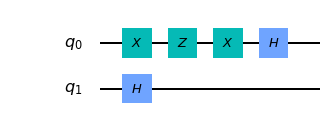

In [4]:
#Create the Measurement Circuit
qc = QuantumCircuit(2)
x = XGate()
h = HGate()
z = ZGate()
qc.append(x,[0])
qc.append(z,[0])
qc.append(x,[0])
qc.append(h,[0])
qc.append(h,[1])
qc.draw('mpl')

In [5]:
job = execute(qc, Aer.get_backend('statevector_simulator'), optimization_level=0)
result = job.result()

outputstate = result.get_statevector(qc)

print(outputstate)
print(state_vector)

[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
[-0.5, 0.5, 0.5, -0.5]
